# Tulio Quijada - Coursera - Capstone Project

# Introduction/Business Problem section

## a friend who recently moved to Toronto, has decided to open a restaurant of Venezuelan food in Toronto.

## The most important questions you have are:

## Is there a relevant Hispanic community in Toronto with an appetite for this type of flavors?

## What would be the most effective neighborhood to open the restaurant, considering the flow of people and close to places of relevance?

# Data section

## Foursquera / Exploration data / Taking as Center (43.653963 -79.387207) Lat and Log Toronto

## path = 'Hispanic countries in latin amertica.csv' / Hispanic countries

## path = 'IRCC_PRadmiss_0004_E.xls' / Canada inmigration data 

## path = 'Toronto recent inmigration.xls'/ inmigrant census for Toronto

## 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' / Neighbourhood information Toronto / Lat and Lon

## importing libraries

In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

## Data acquisition and cleaning / Canada inmigration information / Hispanic countries

In [4]:
path = 'Hispanic countries in latin amertica.csv'
df_hispanic_countries = pd.read_csv(path)

path = 'IRCC_PRadmiss_0004_E.xls'
df_total_inmigration = pd.read_excel(path)

df_total_inmigration.loc[:,'Total'] = df_total_inmigration.sum(axis=1)
df_hispanic_inmigration = df_total_inmigration[df_total_inmigration.set_index(['Country of Citizenship']).index.isin(df_hispanic_countries.set_index(['Country']).index)]
df_hispanic_inmigration.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_hispanic_inmigration = df_hispanic_inmigration.reset_index(drop=True)

df_hispanic_inmigration = df_hispanic_inmigration.rename(columns={'Country of Citizenship': 'Country', 'Q1-Q2 2016': '2016'})

df_hispanic_inmigration.set_index('Country', inplace=True)


top5_hispanic = df_hispanic_inmigration.head()
top5_hispanic = top5_hispanic.drop('Total', axis=1)
top5_hispanic = top5_hispanic.transpose()
top5_hispanic.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Country,Colombia,Mexico,El Salvador,Peru,Venezuela
1980,266,409,110,317,103
1981,326,394,295,456,117
1982,360,491,882,401,174
1983,244,490,2587,241,124
1984,235,509,2666,306,142


## Visualization Immigration Trend of Top 5 Countries from latin america

Matplotlib version:  3.0.3


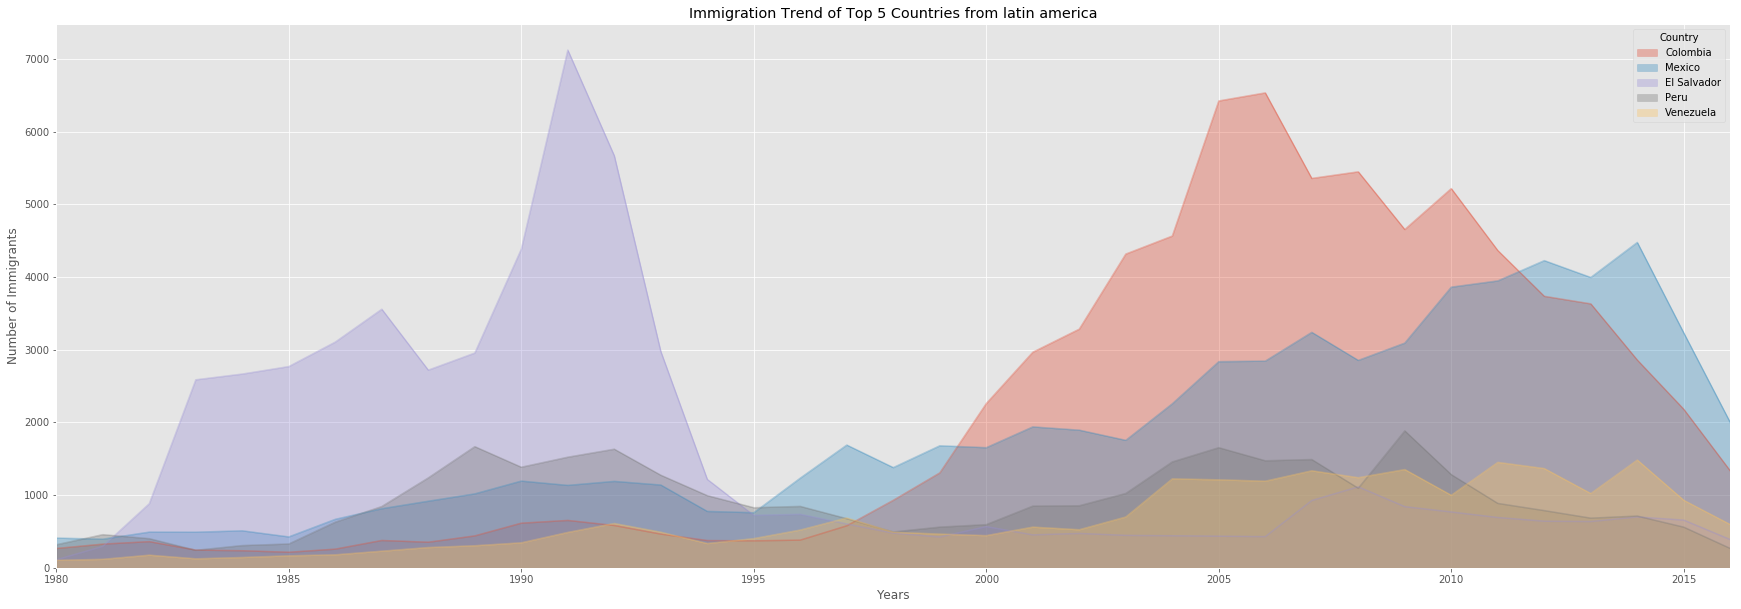

In [5]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

top5_hispanic.index = top5_hispanic.index.map(int) # let's change the index values of df_top5 to type integer for plotting
top5_hispanic.plot(kind='area',
             alpha=0.35,                  
             stacked=False,
             figsize=(30, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries from latin america')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Data acquisition and cleaning - Toronto Recent inmigration 

### removing countries from the Americas with diferente background - 'Brazil','Haiti', 'Jamaica', 'United States' / assuming that Other places of birth in Americas mostly are hispanic

In [11]:
path = 'Toronto recent inmigration.xls'
df_inmigration_toronto = pd.read_excel(path)
df_inmigration_toronto.set_index('Country', inplace=True)

df_inmigration_toronto = df_inmigration_toronto.drop('Toronto - Female',axis=1)
df_inmigration_toronto = df_inmigration_toronto.drop('Toronto - Male',axis=1)

df_inmigration_toronto = df_inmigration_toronto.drop(['Brazil','Haiti', 'Jamaica', 'United States' ])

df_inmigration_toronto.loc["Total - All countries"] = df_inmigration_toronto.sum()

df_inmigration_toronto

#total_toronto = df_inmigration_toronto.apply(np.sum)
#total_toronto['Country'] = 'total'
#df_inmigration_toronto.append(pd.DataFrame(total.values, index=total.keys()).T, ignore_index=True)

,Total - Toronto
Country,
Colombia,2610
Cuba,1200
Mexico,3045
Venezuela,1880
Other places of birth in Americas,13250
Total - All countries,21985


## Visualization - Toronto Recent inmigration 


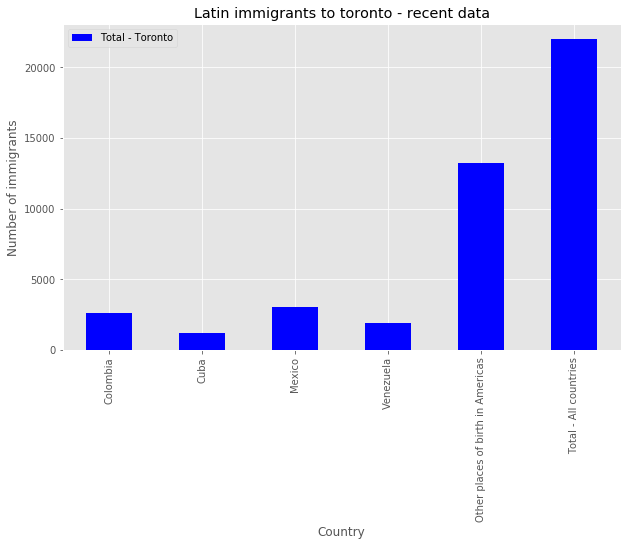

In [12]:
df_inmigration_toronto.plot(kind='bar', figsize=(10, 6), color = 'b')

plt.xlabel('Country') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Latin immigrants to toronto - recent data') # add title to the plot

plt.show()

### Data shows that, counting just for hispanic population legally licensed in Toronto we are having a interesting costumer base. All this is not counting for possible interest in the non hispanic comunity in Toronto

## Toronto neighbourhood localization

In [15]:
#Using BeautifulSoup
from bs4 import BeautifulSoup
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_url,'lxml')

#creating data set from return of BeautifulSoup library
My_table = soup.find_all('table')[0]
df_table = pd.read_html(str(My_table))[0]

#Removing 'Not assigned' values from series 'Borough'
df_table.drop(df_table[df_table.Borough == 'Not assigned'].index, inplace=True)
df_table = df_table.reset_index (drop=True)

#Removing 'Not assigned' values from series 'Neighbourhood' and seting values = to 'Borough' values
df_table.loc[df_table['Neighbourhood'] == 'Not assigned', ['Neighbourhood'] ] =   df_table['Borough']

#Group by 'Postcode', 'Borough' and seting list for common Neighbourhood
df_table_f = df_table.groupby(('Postcode', 'Borough'))
result = df_table_f['Neighbourhood'].unique()
df_toronto = pd.DataFrame(result)
df_toronto.reset_index( inplace=True)

#seting Neighbourhood
df_toronto['Expand'] = df_toronto.Neighbourhood.apply(', '.join)
del df_toronto['Neighbourhood']
df_toronto = df_toronto.rename(columns={'Expand' : 'Neighbourhood'})

#df_toronto Shape
df_toronto.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.


,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


##  Toronto Geo Coordinates

In [16]:
toronto_geo_cordi = pd.read_csv('Geospatial_Coordinates.csv')
toronto_geo_cordi = toronto_geo_cordi.rename(columns={'Postal Code' : 'Postcode'})
toronto_geo_cordi.head()

total_df = pd.merge(df_toronto, toronto_geo_cordi, on='Postcode')
total_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## Getting data from foursquare

In [17]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'NZCX1REGWDFVBFWFR3JUBVAXB1SZMVZDMSM5IO0BONP1JJPQ' # your Foursquare ID
CLIENT_SECRET = 'P5CHDA2HSVDJTSBJFUJXCE5RC5BNTSLBNFVMF111JOAAX1HI' # your Foursquare Secret
VERSION = '20180406'
LIMIT = 1000
radius = 10000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NZCX1REGWDFVBFWFR3JUBVAXB1SZMVZDMSM5IO0BONP1JJPQ
CLIENT_SECRET:P5CHDA2HSVDJTSBJFUJXCE5RC5BNTSLBNFVMF111JOAAX1HI


In [18]:
address = 'toronto, canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


In [19]:
# define URL
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

# send GET request and get trending venues
results = requests.get(url).json()
items = results['response']['groups'][0]['items']




In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
dataframe_filtered.head()
# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.shape

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Downtown Toronto,Neighborhood,NaN,CA,Toronto,Canada,NaN,174,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65323167517444...",43.653232,-79.385296,NaN,NaN,ON,5227bb01498e17bf485e6202
1,Art Gallery of Ontario,Art Gallery,317 Dundas St W,CA,Toronto,Canada,at Beverley St,460,"[317 Dundas St W (at Beverley St), Toronto ON ...","[{'label': 'display', 'lat': 43.65400286033738...",43.654003,-79.392922,NaN,M5T 1G4,ON,4ad4c05ef964a520daf620e3
2,Nathan Phillips Square,Plaza,100 Queen St W,CA,Toronto,Canada,at Bay St,351,"[100 Queen St W (at Bay St), Toronto ON M5H 2N...","[{'label': 'display', 'lat': 43.65227047322295...",43.652270,-79.383516,NaN,M5H 2N1,ON,4ad4c05ef964a520a6f620e3
3,Pai,Thai Restaurant,18 Duncan St,CA,Toronto,Canada,Adelaide and Duncan,681,"[18 Duncan St (Adelaide and Duncan), Toronto O...","[{'label': 'display', 'lat': 43.64792310735613...",43.647923,-79.388579,Entertainment District,M5H 3G6,ON,529612de11d2ab526191ccc9
4,Four Seasons Centre for the Performing Arts,Concert Hall,145 Queen St. W,CA,Toronto,Canada,at University Ave.,391,"[145 Queen St. W (at University Ave.), Toronto...","[{'label': 'display', 'lat': 43.650592, 'lng':...",43.650592,-79.385806,NaN,M5H 4G1,ON,4ad4c062f964a520e5f720e3


## Printing information into folium.Map - Center downtown Toronto

In [22]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred downtown toronto


# downtown toronto
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='citi center',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(venues_map)
    
for lat, lng, borough, neighborhood in zip(total_df['Latitude'], total_df['Longitude'], total_df['Borough'], total_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.7,
        parse_html=False).add_to(venues_map)  

# display map
venues_map

# Conclusion and Recommendation


## - We can indicate that Toronto has an interesting client base in the Hispanic community, all of the above, without counting the non-Hispanic population that lives in the city and that could potentially show interest in this type of cuisine.

## - As we can see on the map above, the best location for a new Venezuelan restaurant

## Downtown Toronto
## Chinatown, Grange Park, Kensington Market
## St. James Town
## Design Exchange, Toronto Dominion Centre
## Commerce Court, Victoria Hotel
## Harbourfront East, Toronto Islands, Union Station